In [54]:
import string
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [45]:
def file_read_clean(filename):
    dataset_directory = "D:\\Coursework\\Capstone\\clean_repo\\data_load\\dataset"
    bank_vs_demo = pd.read_csv(dataset_directory+"\\"+filename)
    print(bank_vs_demo.columns)
    # drop year, state, zip
    bank_vs_demo = bank_vs_demo.drop(['Unnamed: 0','year','state','zip','bank_open','bank_close',
                                                                'bank_net'], axis=1)
    data_list = bank_vs_demo.drop('ground_truth', axis=1)
    label_list = bank_vs_demo['ground_truth'] 
    #Create train and test data. test_size 0.3 means 30% of data will be test data.
    #change dataframe to matrix - data_list and label-list
    train_features, test_features, train_labels, test_labels = train_test_split(data_list.as_matrix(), label_list.as_matrix(), test_size=0.3, random_state=None )
    return train_features, test_features, train_labels, test_labels

In [46]:
def confusion_matrix_accuracy(test_labels,pred_labels):
    # create confusion matrix
    matrix = confusion_matrix(test_labels, pred_labels)
    accuracy = accuracy_score(test_labels, pred_labels)
    # print the accuracy score on the test data
    print('Accuracy Score :',accuracy)
    return matrix,accuracy

In [47]:
def f1(pred, ground):
    """ evaluates a classifier based on a supplied validation data

    args:
        pred: numpy.ndarray(bool) -- predictions
        ground: numpy.ndarray(bool) -- known ground-truth values
    
    return : double -- the F1 score of the predictions
    """
    pred = np.array(pred, dtype=bool)
    ground = np.array(ground, dtype=bool)

    return f1_score(ground,pred)

In [55]:
def train_evaluate(train_features,train_labels):
    #option1 decision tree classifier model
    clf = RandomForestClassifier(max_depth = 3,random_state=0)
    clf = clf.fit(train_features, train_labels)

    # create prediction
    predicted = clf.predict(train_features)
    return predicted,clf

Index(['Unnamed: 0', 'year', 'state', 'zip', 'bank_open', 'bank_close',
       'bank_net', 'ground_truth', 'small_business_loan', 'deposit',
       'white_population', 'black_and_african_population',
       'indian_and_alaska_population', 'asian_population',
       'islander_population', 'other_race_population', 'population',
       'age_18_over_percent', 'age_60_over_percent', 'population_0_to_17',
       'population_18_to_59', 'poplulation_over_60', 'unemployment_rate',
       'household_income', 'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR'

D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
D:\ProgramFiles\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\ProgramFiles\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy Score : 0.9674372968663764


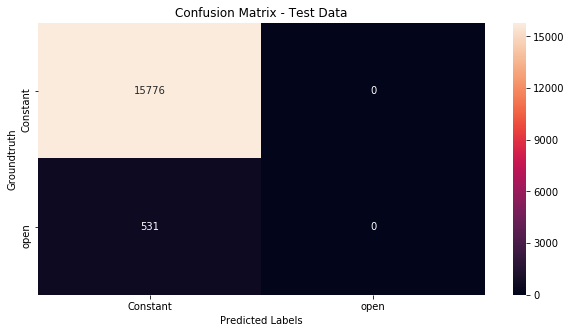

In [59]:
filename = "bank_vs_demo_dataset_open.csv"
train_features, test_features, train_labels, test_labels = file_read_clean(filename)
train_preds, model = train_evaluate(train_features, train_labels)
test_preds = model.predict(test_features)
test_f1_score = f1(test_preds, test_labels)
matrix,accuracy = confusion_matrix_accuracy(test_labels,test_preds)

# create label
labels = ['Constant','open']

# display the heatmap of confusion matrix on the test data
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.set_title('Confusion Matrix - Test Data')
sns.heatmap(matrix, annot =True, fmt="d", xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Groundtruth')

plt.show()